In [1]:
import torch
import sys

sys.path.append('..')

from SourceCode import *

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [33]:
left_border = 0
right_border = 1
n_points = 20
n_int_points = 10
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 
               0.5 * IntegralEquations.calculate_fredholm_equation_1d_gauss_quadratures(
                                                        integration_func,
                                                        nn_model,
                                                        curr_v,
                                                        left_border,
                                                        right_border))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 40
nn_params = {'layers_hidden' : [1, 10, 10, 1]}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type='KAN'
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.3, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

In [34]:
analytical_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution,
                     main_eq_residuals=main_eq_res
                         )

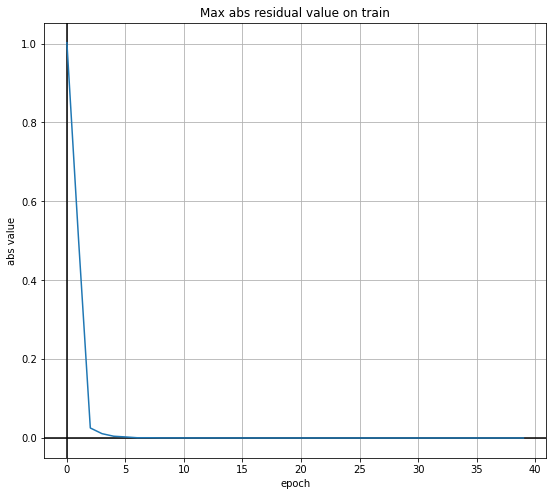

In [35]:
report.print_loss_history()

Max residual value |R[NN]| on train: 0.00014477968215942383
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00022077560424804688
Valid max absolute error |Appr(x)-y(x)|: 0.00031453371047973633
MAPE on train data: 0.00752514461055398 %
MAPE on validation data: 0.008283956412924454 %
Max abs value of residual on train at last epoch: 0.00014466047286987305 


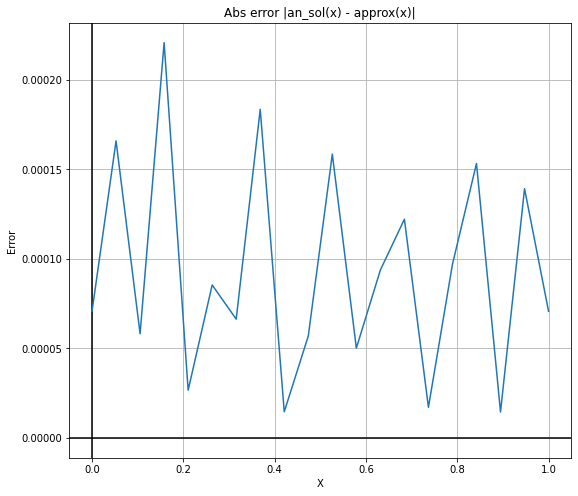

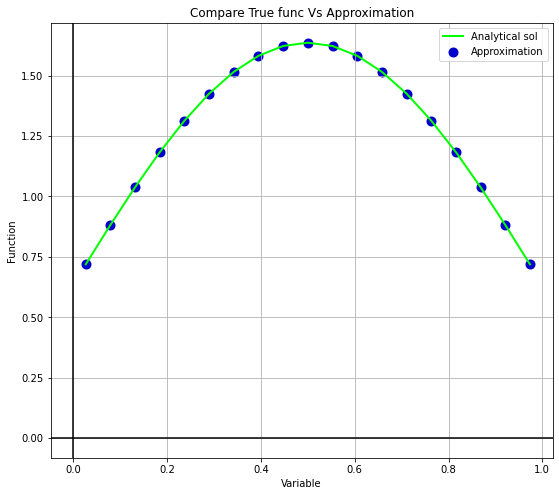

In [36]:
report.compare_appr_with_analytical(offset=0)

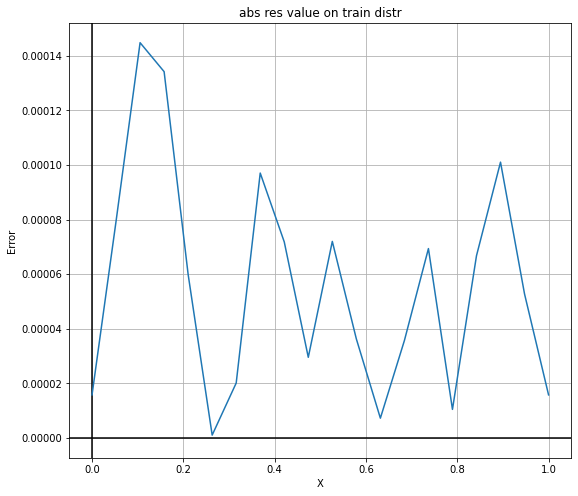

In [37]:
report.plot_abs_residual_distr(offset=0)

In [38]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.010000      0.668031  0.667793   0.000238
1   0.061579      0.828871  0.828778   0.000093
2   0.113158      0.984675  0.984707   0.000032
3   0.164737      1.131360  1.131137   0.000223
4   0.216316      1.265083  1.265055   0.000028
5   0.267895      1.382341  1.382255   0.000086
6   0.319474      1.480061  1.479992   0.000068
7   0.371053      1.555683  1.555497   0.000186
8   0.422632      1.607226  1.607218   0.000008
9   0.474211      1.633339  1.633281   0.000059
10  0.525789      1.633339  1.633181   0.000159
11  0.577368      1.607226  1.607172   0.000053
12  0.628947      1.555683  1.555596   0.000087
13  0.680526      1.480060  1.479932   0.000128
14  0.732105      1.382341  1.382318   0.000022
15  0.783684      1.265083  1.265005   0.000078
16  0.835263      1.131360  1.131195   0.000165
17  0.886842      0.984675  0.984671   0.000004
18  0.938421      0.828871  0.828790   0.000081
19  0.990000      0.668030  0

# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [6]:
left_border = 0
right_border = pi/2
n_points = 20
n_int_points = 20
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               0.5 * IntegralEquations.calculate_fredholm_equation_1d_gauss_quadratures(
                                    integration_func,
                                    nn_model,
                                    curr_v,
                                    left_border,
                                    right_border) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_params = {'hidden_dim': 10, 'num_hidden_layers': 3}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type='MLP'
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.1, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

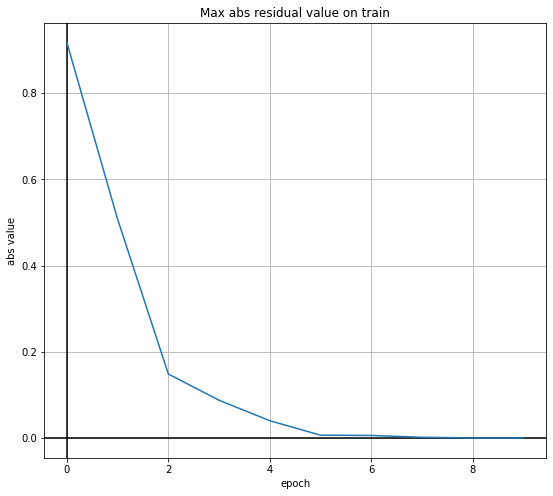

In [7]:
analytical_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00588226318359375
Valid max absolute error |Appr(x)-y(x)|: 0.005672335624694824
MAPE on train data: 0.3324891906231642 %
MAPE on validation data: 0.33057339023798704 %
Max abs value of residual on train at last epoch: 0.0003171563148498535 


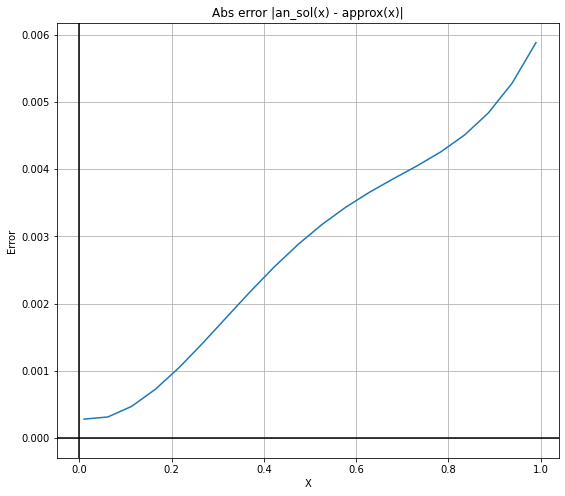

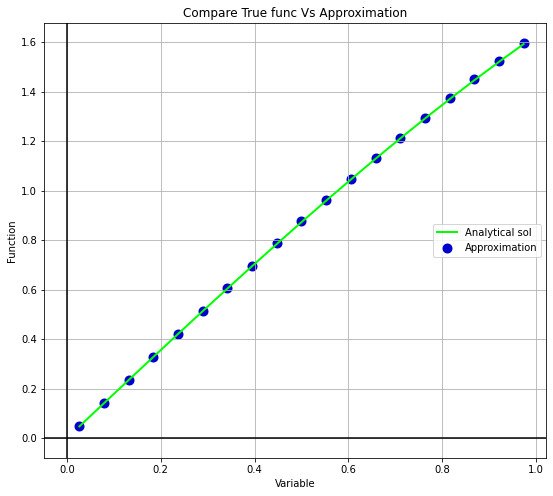

In [8]:
report.compare_appr_with_analytical()

In [9]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.010000      0.017854  0.018135   0.000281
1   0.061579      0.109904  0.110217   0.000313
2   0.113158      0.201791  0.202261   0.000471
3   0.164737      0.293377  0.294102   0.000725
4   0.216316      0.384527  0.385576   0.001049
5   0.267895      0.475106  0.476521   0.001415
6   0.319474      0.564981  0.566781   0.001800
7   0.371053      0.654021  0.656203   0.002182
8   0.422632      0.742096  0.744643   0.002547
9   0.474211      0.829080  0.831961   0.002880
10  0.525789      0.914850  0.918026   0.003176
11  0.577368      0.999285  1.002718   0.003433
12  0.628947      1.082268  1.085925   0.003657
13  0.680526      1.163686  1.167543   0.003857
14  0.732105      1.243431  1.247480   0.004049
15  0.783684      1.321398  1.325655   0.004257
16  0.835263      1.397487  1.401996   0.004509
17  0.886842      1.471604  1.476442   0.004837
18  0.938421      1.543660  1.548941   0.005281
19  0.990000      1.613570  1

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [22]:
n_int_points = 100
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               IntegralEquations.calculate_fredholm_equation_1d_gauss_quadratures(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 40
nn_params = {'hidden_dim': 20, 'num_hidden_layers': 3}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type="MLP"
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.01, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

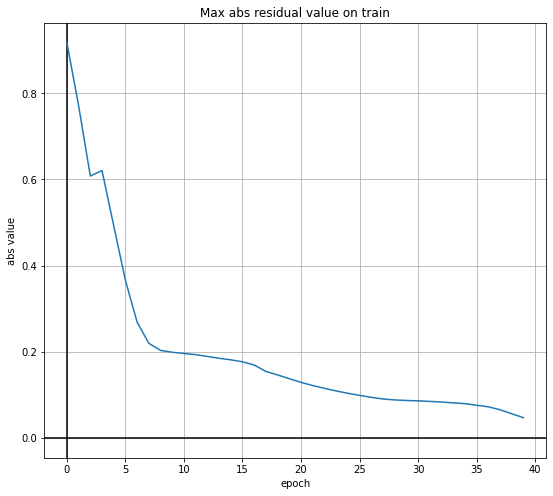

In [23]:
analytical_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.031158357858657837
Valid max absolute error |Appr(x)-y(x)|: 0.030767962336540222
MAPE on train data: 0.6204376462846994 %
MAPE on validation data: 0.6567453499883413 %
Max abs value of residual on train at last epoch: 0.04730188846588135 


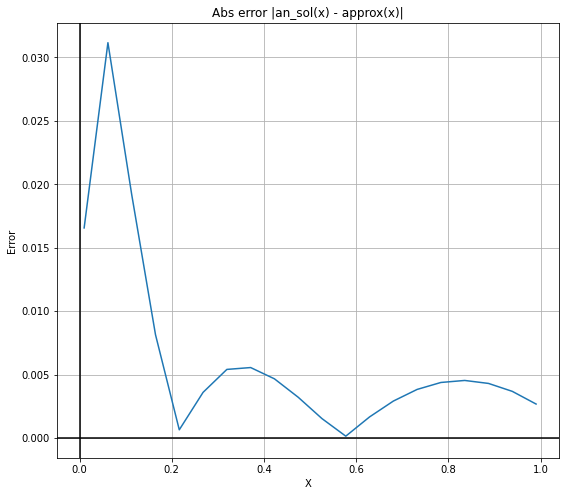

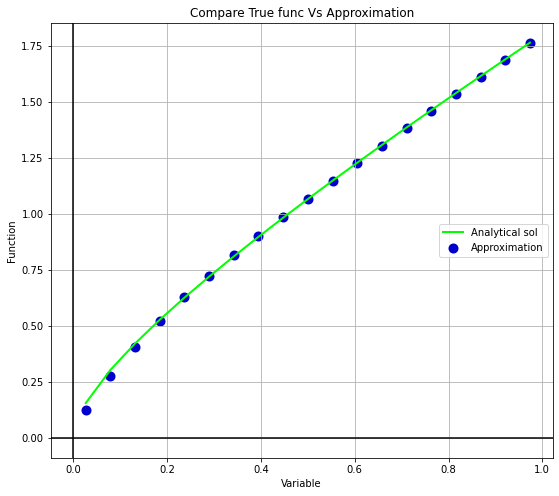

In [24]:
report.compare_appr_with_analytical()

In [25]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.010000      0.090000  0.073441   0.016559
1   0.061579      0.260100  0.228941   0.031158
2   0.113158      0.382270  0.363082   0.019187
3   0.164737      0.489439  0.481294   0.008145
4   0.216316      0.588394  0.587745   0.000649
5   0.267895      0.681963  0.685562   0.003599
6   0.319474      0.771650  0.777058   0.005408
7   0.371053      0.858365  0.863920   0.005555
8   0.422632      0.942713  0.947379   0.004667
9   0.474211      1.025114  1.028328   0.003214
10  0.525789      1.105880  1.107410   0.001530
11  0.577368      1.185246  1.185099   0.000147
12  0.628947      1.263397  1.261733   0.001664
13  0.680526      1.340478  1.337565   0.002913
14  0.732105      1.416610  1.412779   0.003832
15  0.783684      1.491892  1.487512   0.004380
16  0.835263      1.566405  1.561867   0.004538
17  0.886842      1.640220  1.635917   0.004304
18  0.938421      1.713398  1.709719   0.003679
19  0.990000      1.785990  1

# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [27]:
left_border = 0
right_border = 1
n_points = 20
n_int_points = 50
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - 
               IntegralEquations.calculate_volterra_equation1d(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_int_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_params = {'hidden_dim': 10, 'num_hidden_layers': 3}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type="MLP"
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

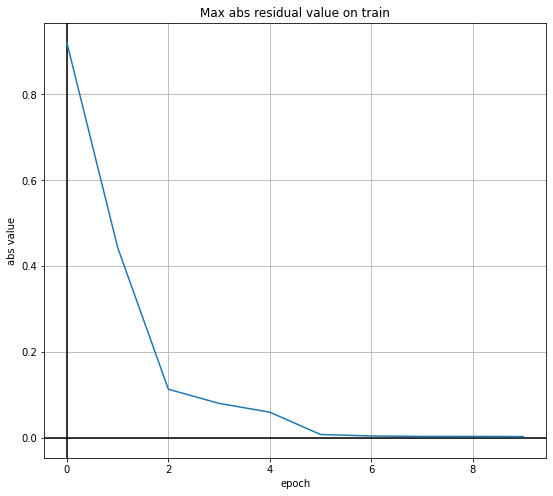

In [28]:
analytical_solution = lambda x_var: x_var
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution,
                         main_eq_residuals=main_eq_res
                         )
report.print_loss_history()

Max residual value |R[NN]| on train: 0.0015237480401992798
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0015689730644226074
Valid max absolute error |Appr(x)-y(x)|: 0.0012410879135131836
MAPE on train data: 0.12854260858148336 %
MAPE on validation data: 0.12208368862047791 %
Max abs value of residual on train at last epoch: 0.003454834222793579 


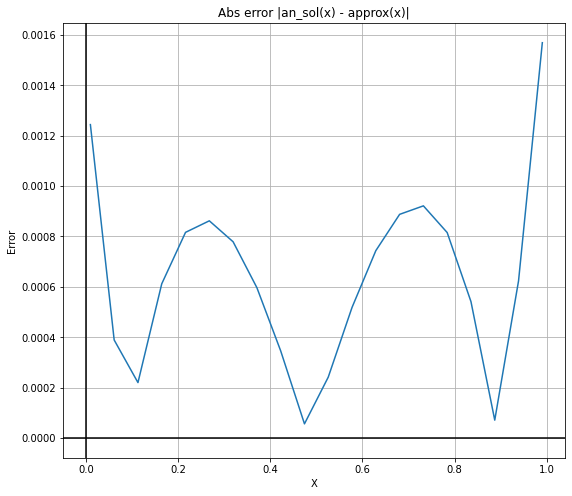

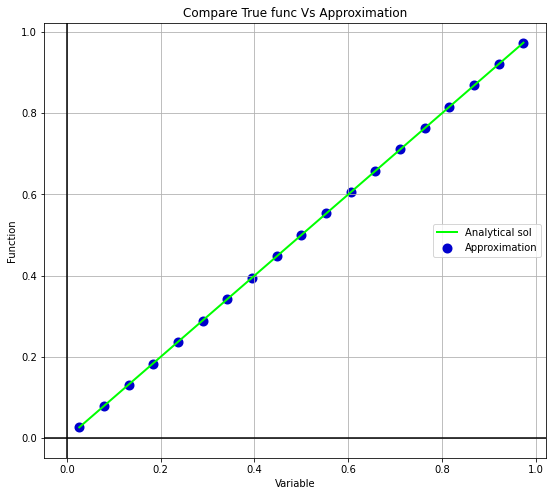

In [29]:
report.compare_appr_with_analytical()

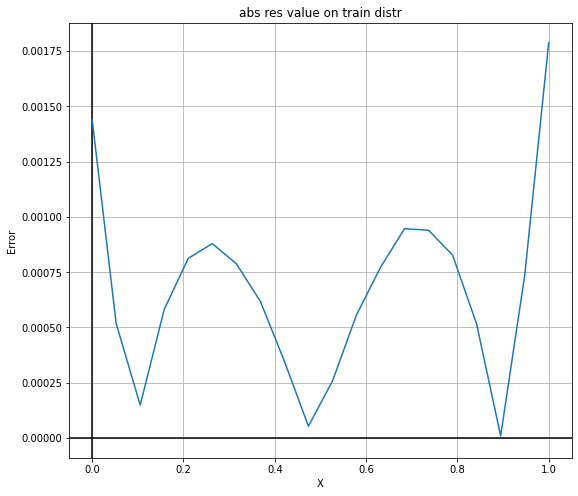

In [30]:
report.plot_abs_residual_distr(offset=0)

In [31]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.010000      0.010000  0.011244   0.001244
1   0.061579      0.061579  0.061968   0.000389
2   0.113158      0.113158  0.112938   0.000220
3   0.164737      0.164737  0.164125   0.000612
4   0.216316      0.216316  0.215500   0.000816
5   0.267895      0.267895  0.267033   0.000862
6   0.319474      0.319474  0.318695   0.000779
7   0.371053      0.371053  0.370456   0.000597
8   0.422632      0.422632  0.422286   0.000346
9   0.474211      0.474211  0.474154   0.000056
10  0.525789      0.525789  0.526031   0.000242
11  0.577368      0.577368  0.577887   0.000518
12  0.628947      0.628947  0.629691   0.000744
13  0.680526      0.680526  0.681414   0.000888
14  0.732105      0.732105  0.733027   0.000921
15  0.783684      0.783684  0.784500   0.000815
16  0.835263      0.835263  0.835805   0.000541
17  0.886842      0.886842  0.886913   0.000071
18  0.938421      0.938421  0.937798   0.000623
19  0.990000      0.990000  0